In [53]:
#  Importing all necessary libraries

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

import pickle  # converting objects to files

In [54]:
df =pd.read_csv("placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [55]:
df = df.iloc[:,1:]

In [56]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [57]:
'''
1. Preprocessing ---> EDA + Feature Selection
2. Extract input and output cols
3. Train Test Split
4. Train the model 
5. Evaluate  the model/ model selection 
6. Deploy the model
'''

'\n1. Preprocessing ---> EDA + Feature Selection\n2. Extract input and output cols\n3. Train Test Split\n4. Train the model \n5. Evaluate  the model/ model selection \n6. Deploy the model\n'

# 1. Preprocessing ---> EDA + Feature Selection

In [58]:
df.shape

(100, 3)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [60]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


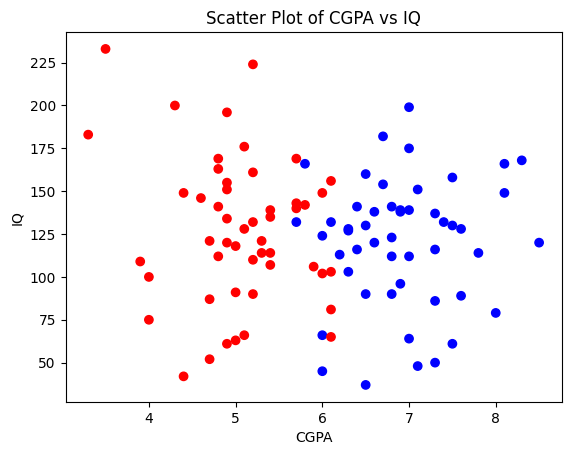

In [61]:
color_map = {1: 'blue', 0: 'red'}  # Assuming 1 for 'Placed' and 0 for 'Not Placed'

colors = df['placement'].map(color_map)
plt.scatter(df['cgpa'], df['iq'], c=colors)
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Scatter Plot of CGPA vs IQ')

plt.show()

# 2. Feature Selection

In [62]:
correlation_matrix = df.corr()
print(correlation_matrix)


               cgpa        iq  placement
cgpa       1.000000 -0.098791   0.821688
iq        -0.098791  1.000000  -0.083031
placement  0.821688 -0.083031   1.000000


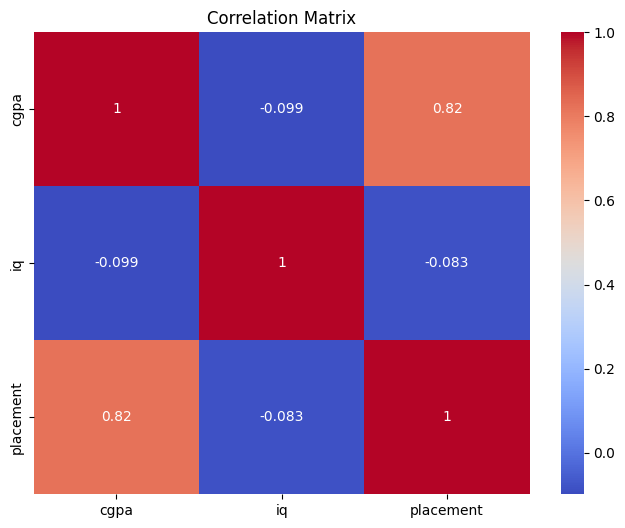

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# 3. Extract input and output cols


In [64]:
X = df.iloc[:, 0:2]
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [65]:
y= df.iloc[:,-1]
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

# 4. Applying Train test split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)
X_train

,cgpa,iq
93,6.8,112.0
66,6.9,96.0
19,5.2,132.0
35,6.8,90.0
39,4.6,146.0
...,...,...
11,6.9,138.0
13,6.4,116.0
74,6.7,154.0
70,6.3,127.0


In [67]:
y_train

93    1
66    1
19    0
35    1
39    0
     ..
11    1
13    1
74    1
70    1
45    1
Name: placement, Length: 90, dtype: int64

In [68]:
X_test

,cgpa,iq
9,5.1,66.0
65,8.1,166.0
97,6.7,182.0
87,5.7,132.0
28,5.2,90.0
48,6.6,138.0
72,7.3,116.0
99,6.2,113.0
29,7.0,112.0
38,6.5,160.0


# 5. Scaling the model

In [69]:
scaler = StandardScaler()

In [70]:
X_train = scaler.fit_transform(X_train)
# X_train

In [71]:
X_test = scaler.transform(X_test)
X_test

array([[-0.73025796, -1.41696351],
       [ 1.87436092,  1.06265376],
       [ 0.65887211,  1.45939252],
       [-0.20933418,  0.21958388],
       [-0.64343733, -0.82185537],
       [ 0.57205148,  0.36836092],
       [ 1.17979589, -0.17715488],
       [ 0.22476896, -0.2515434 ],
       [ 0.919334  , -0.27633957],
       [ 0.48523085,  0.91387672]])

# 6. Train the model

In [72]:
# Using logistic regression

clf = LogisticRegression()

In [73]:
# Model training
clf.fit(X_train,y_train)

LogisticRegression()

# 7. Evaluate  the model/ model selection 


In [74]:
y_pred = clf.predict(X_test)

In [75]:
y_test

9     0
65    1
97    1
87    1
28    0
48    1
72    1
99    1
29    1
38    1
Name: placement, dtype: int64

In [76]:
# Without using libraries
# def calculate_accuracy(y_test, y_pred):
#     correct_predictions = sum(y_t == y_p for y_t, y_p in zip(y_test, y_pred))
#     total_predictions = len(y_test)
#     accuracy = correct_predictions / total_predictions
#     return accuracy


# y_test = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
# y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]

# accuracy = calculate_accuracy(y_test, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%')


In [77]:
accuracy_score(y_test,y_pred)   # Using libraries

0.9

<Axes: >

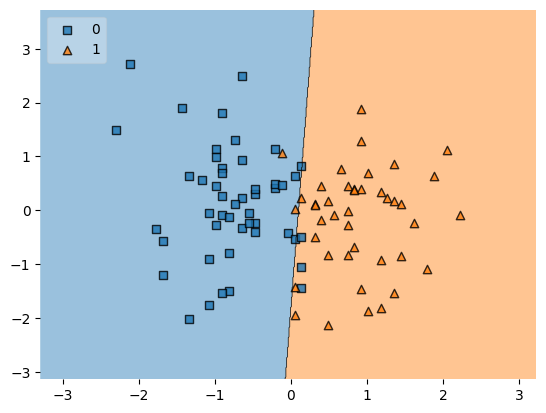

In [78]:
plot_decision_regions(X_train, y_train.values, clf = clf, legend =2)

# 8. Exporting the model

In [79]:
pickle.dump(clf, open('model.pkl','wb'))